# Intermediate Python (2) Iterators
by [Yao-Yuan Mao](https://yymao.github.io)

Write 2-3 compatible code: http://python-future.org/compatible_idioms.html

Run `conda install future`  or  `pip install future` 

In [2]:
from __future__ import division, print_function, unicode_literals
from builtins import *

In [3]:
import numpy as np
from IPython.display import display
import StringIO

## Iterator vs. iterable

- *iterator* is an object that has the `__next__` method
- an *iterable* object can be turned into an iterator

In [4]:
myList = [1, 1, 2, 3, 5, 8, 13]

In [5]:
for element in myList:
    display(element)

1

1

2

3

5

8

13

In [6]:
next(myList)

TypeError: 'list' object is not an iterator

In [7]:
iterList1 = iter(myList)
iterList2 = iter(myList)
display(iterList1)

In [8]:
print(next(iterList1))
print(next(iterList1))

1
1


In [9]:
print(next(iterList2))

1


In [10]:
list(iterList1)

[2, 3, 5, 8, 13]

In [11]:
list(iterList2)

[1, 2, 3, 5, 8, 13]

### Questions

- Is an iterator iterable?
- How to tell if an object is iterable?
- What are the common built-in objects that are iterable?

## What's being iterated for common iterables?

In [12]:
for char in 'iterators':
    display(char)

u'i'

u't'

u'e'

u'r'

u'a'

u't'

u'o'

u'r'

u's'

In [13]:
for key in {'color':'red', 'size':2.0, 'line_style':'-'}:
    display(key)

u'color'

u'line_style'

u'size'

In [14]:
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
display(arr)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
for row in arr:
    display(row)

array([1, 2, 3])

array([4, 5, 6])

array([7, 8, 9])

In [16]:
for element in arr.flat:
    display(element)

1

2

3

4

5

6

7

8

9

In [17]:
f = StringIO.StringIO('this is the first line\nthis is the second line\nthis is the third line\n')

for line in f:
    display(line)

u'this is the first line\n'

u'this is the second line\n'

u'this is the third line\n'

## Why should we use the native iteration method?
- it's faster
- it makes your code more readable

In [18]:
%%timeit myList = list(range(1000000))
for i in range(len(myList)):
    x = myList[i]

1 loop, best of 3: 1.15 s per loop


In [19]:
%%timeit myList = list(range(1000000))
for element in myList:
    x = element

10 loops, best of 3: 23.3 ms per loop


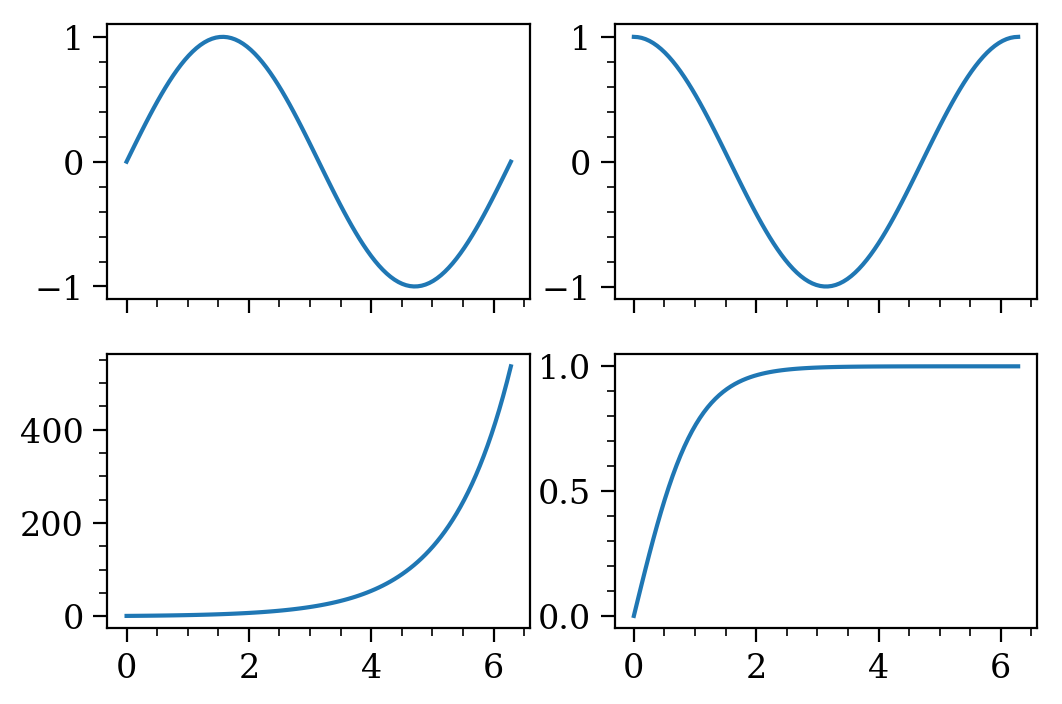

In [20]:
functions = (np.sin, np.cos, np.exp, np.tanh)
fig, ax = plt.subplots(2, 2, sharex=True)

x = np.linspace(0, np.pi*2.0, 100)
for func, ax_this in zip(functions, ax.flat):
    ax_this.plot(x, func(x))

## Write your own iterator!

In [21]:
class iterFibonacci(object):
    def __init__(self, limit=100):
        self.f0 = 0
        self.f1 = 1
        self.limit = limit
    
    def __next__(self):
        self.f0, self.f1 = self.f1, self.f0 + self.f1
        if self.f0 > self.limit:
            raise StopIteration
        return self.f0
 
    def __iter__(self):
        return self
    

In [22]:
list(iterFibonacci(200))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

In [23]:
class iterCumSum(object):
    def __init__(self, iterable):
        self.it = iter(iterable)
        
    def __next__(self):
        if hasattr(self, 'sum'):
            self.sum += next(self.it)
        else:
            self.sum = next(self.it)
        return self.sum
 
    def __iter__(self):
        return self

In [51]:
list(iterCumSum([1,2,3,4]))

[1, 3, 6, 10]

## Generator

A *generator* is a specific kind of iterators that are constructed by either a generator function or a generator expression (yes, so generators *are* iterators)

### Generator expression

In [52]:
it = (c for c in 'abcdefg')

In [53]:
display(it)

<generator object <genexpr> at 0x7fad3c1e3280>

In [54]:
list(it)

[u'a', u'b', u'c', u'd', u'e', u'f', u'g']

In [55]:
it = (x*x if x <= 2 else 0 for x in range(10) if x%2==0)
list(it)

[0, 4, 0, 0, 0]

### Generator function

In [56]:
class iterFibonacci(object):
    def __init__(self, limit=100):
        self.f0 = 0
        self.f1 = 1
        self.limit = limit
    
    def __next__(self):
        self.f0, self.f1 = self.f1, self.f0 + self.f1
        if self.f0 > self.limit:
            raise StopIteration
        return self.f0
 
    def __iter__(self):
        return self
    

In [57]:
def genFibonacci(limit=100):
    f0 = 0
    f1 = 1
    while f0 <= limit:
        f0, f1 = f1, f0+f1
        yield f0
        

In [58]:
list(genFibonacci())

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

In [59]:
def genTrivial():
    yield 1
    yield 2
    yield 3

In [60]:
it = genTrivial()
display(it)

<generator object genTrivial at 0x7fad3c1bb820>

In [61]:
next(it)

1

In [62]:
class iterCumSum(object):
    def __init__(self, iterable):
        self.it = iter(iterable)
        
    def __next__(self):
        if hasattr(self, 'sum'):
            self.sum += next(self.it)
        else:
            self.sum = next(self.it)
        return self.sum
 
    def __iter__(self):
        return self

In [63]:
def genCumSum(iterable):
    mysum = None
    for element in iterable:
        if mysum is None:
            mysum = element
        else:
            mysum += element
        yield mysum

In [64]:
list(genCumSum('abcde'))

[u'a', u'ab', u'abc', u'abcd', u'abcde']

## Manipulate iterators

- modify an iterator: `map`, `filter`, `zip`
- reduce an iterator: `any`, `all`, `sum`

In [27]:
def func(x):
    return x+1

list(map(func, [1,2,3,4,5]))

[2, 3, 4, 5, 6]

In [28]:
list(map(lambda x: x+1, [1,2,3,4,5]))

[2, 3, 4, 5, 6]

In [29]:
x=1
list(x+1 for x in [1,2,3,4,5])
print(x)

1


In [30]:
list(map(lambda x, y: x+y, [1,2,3,4,5], [5,6,7,8,9]))

[6, 8, 10, 12, 14]

In [31]:
list(x+y for x, y in zip([1,2,3,4,5], [5,6,7,8,9]))

[6, 8, 10, 12, 14]

In [32]:
list(filter(lambda x: x>=3, [1,2,3,4,5]))

[3, 4, 5]

In [33]:
list(x for x in [1,2,3,4,5] if x >=3)

[3, 4, 5]

In [34]:
list(zip([1,2,3,4,5], [5,6,7,8,9]))

[(1, 5), (2, 6), (3, 7), (4, 8), (5, 9)]

In [35]:
list(enumerate('abcde'))

[(0, u'a'), (1, u'b'), (2, u'c'), (3, u'd'), (4, u'e')]

In [36]:
sum(1 for x in range(100) if x%3==0)

34

In [37]:
any(c=='A' for c in 'abcde')

False

## Exercises

### 1. Rewrite this 
- 1a. Use native iteration method and make it more readable
- 1b. Use comprehension to write this in one single line

In [ ]:
output = []
for i in range(len(files)):
    data = load_file(files[i])
    for j in range(len(data)):
        if check_row(data[j]):
            output.append((files[i], data[j]))

In [ ]:
# solution 1a

output = []
for file in files:
    data = load_file(file)
    output.extend((file, row) for row in data if check_row(row))

In [ ]:
# solution 1b

output = [(file, row) for file in files for row in load_file(file) if check_row(row)]

### 2. Use comprehension to write validation functions

- check if each element of `required` set is presented in the input iterable
- check if each element of the input iterable is presented in `available`

In [42]:
required = set('abcd')
available = set('abcdefghijk')

def check_required(iterable):
    input_set = set(iterable)
    return all(i in input_set for i in required)

def check_available(iterable):
    return all(i in available for i in iterable)

In [43]:
print(check_required('abcde'))
print(check_available('abcde'))

True
True


### 3. Write a "group by" function (or "y conditioned on x")

In [45]:
def grouped_by_x(y, x, xbins, sorter=None):
    if sorter is None:
        sorter = np.argsort(x)
    bin_edge_indices = np.searchsorted(x, xbins, sorter=sorter)
    for i, j in zip(bin_edge_indices[:-1], bin_edge_indices[1:]):
        yield y[sorter[i:j]]

### 4. Write a generator function to do pre-order, depth-first tree traversal

`F, B, A, D, C, E, G, I, H`

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Sorted_binary_tree_preorder.svg/336px-Sorted_binary_tree_preorder.svg.png)

In [48]:
class Note(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        
root = Note('F')
root.left = Note('B')
root.right = Note('G')
root.left.left = Note('A')
root.left.right = Note('D')
root.left.right.left = Note('C')
root.left.right.right = Note('E')
root.right.right = Note('I')
root.right.right.left = Note('H')

In [49]:
def dfs_traversal(tree_root):
    if tree_root is None:
        return
    yield tree_root.value
    
    for i in dfs_traversal(tree_root.left):
        yield i
        
    for i in dfs_traversal(tree_root.right):
        yield i

In [50]:
', '.join(dfs_traversal(root))

u'F, B, A, D, C, E, G, I, H'